In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [24]:
#dataset : https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
mydata=pathlib.Path("D:/Training Mongga/Programming Program/flower_photos")
mydata

WindowsPath('D:/Training Mongga/Programming Program/flower_photos')

In [25]:
image_count=len(list(mydata.glob('*/*.jpg')))
print(image_count)

3670


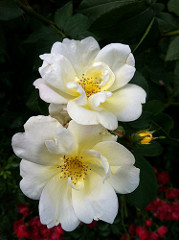

In [26]:
roses=list(mydata.glob("roses/*"))
PIL.Image.open(str(roses[0]))

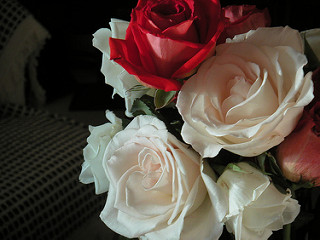

In [27]:
PIL.Image.open(str(roses[1]))

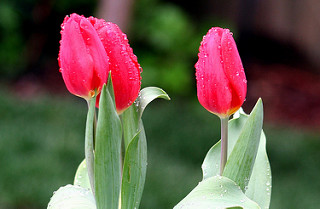

In [28]:
tulips=list(mydata.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

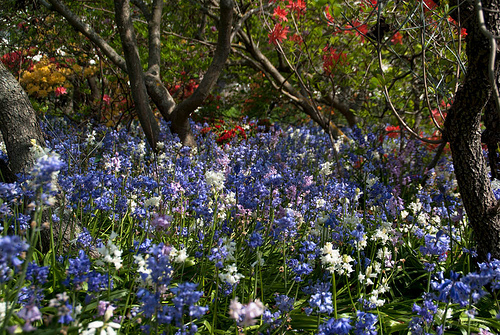

In [29]:
PIL.Image.open(str(tulips[1]))

# Create a Dataset

In [30]:
batch_size=32
img_height=180
img_width=180

In [33]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    mydata,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [37]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    mydata,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [38]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Visualize the data

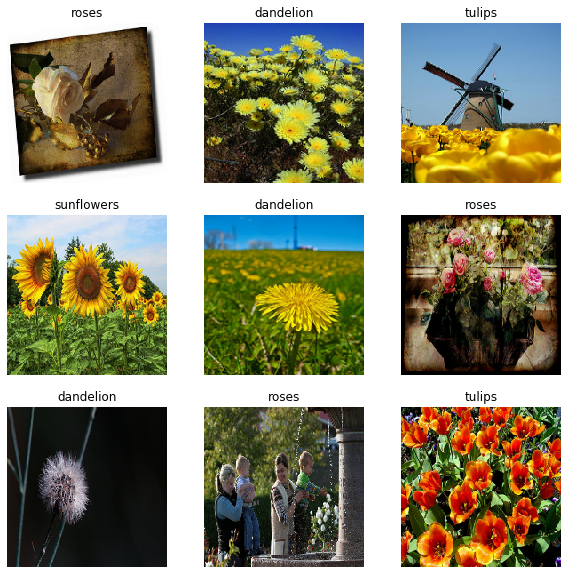

In [39]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [40]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


# Configure the dataset

In [67]:
autotune=tf.data.experimental.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=autotune)
val_ds=val_ds.cache().prefetch(buffer_size=autotune)

# Standardize the data

In [68]:
normalization_layer=layers.experimental.preprocessing.Rescaling(1./255)

In [69]:
normalized_ds=train_ds.map(lambda x, y:(normalization_layer(x),y))
image_batch,labels_batch=next(iter(normalized_ds))
first_image=image_batch[0]
print(np.min(first_image),np.max(first_image))

0.0 1.0


# Create the model

In [70]:
num_classes=5
model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

# Compile the model

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

# Model summary

In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 22, 64)       

# Train the model

In [73]:
epochs=10
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 205s 2s/step - loss: 1.2929 - accuracy: 0.4326 - val_loss: 1.0550 - val_accuracy: 0.5640
Epoch 2/10
92/92 [==============================] - 181s 2s/step - loss: 0.9735 - accuracy: 0.6178 - val_loss: 0.9574 - val_accuracy: 0.6076
Epoch 3/10
92/92 [==============================] - 175s 2s/step - loss: 0.7954 - accuracy: 0.6853 - val_loss: 0.9090 - val_accuracy: 0.6349
Epoch 4/10
92/92 [==============================] - 177s 2s/step - loss: 0.6095 - accuracy: 0.7738 - val_loss: 0.8907 - val_accuracy: 0.6526
Epoch 5/10
92/92 [==============================] - 175s 2s/step - loss: 0.4167 - accuracy: 0.8522 - val_loss: 0.9085 - val_accuracy: 0.6826
Epoch 6/10
92/92 [==============================] - 177s 2s/step - loss: 0.2477 - accuracy: 0.9172 - val_loss: 1.0324 - val_accuracy: 0.6921
Epoch 7/10
92/92 [==============================] - 177s 2s/step - loss: 0.1275 - accuracy: 0.9615 - val_loss: 1.3316 - val_accuracy: 0.6907
Epoch 8/10
92

# Visualize training results

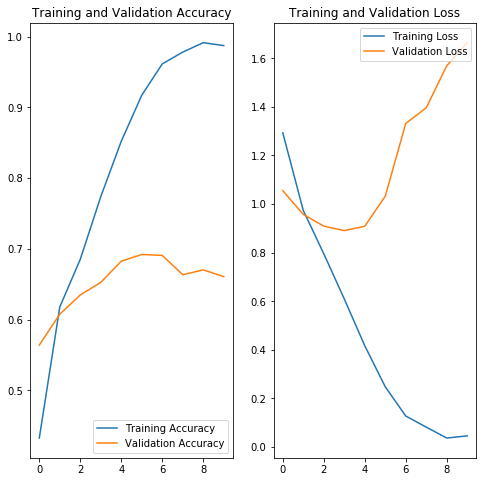

In [74]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Data Augmentation

In [75]:
data_augmen=keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip('horizontal',
                                                     input_shape=(img_height,
                                                                  img_width,
                                                                  3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

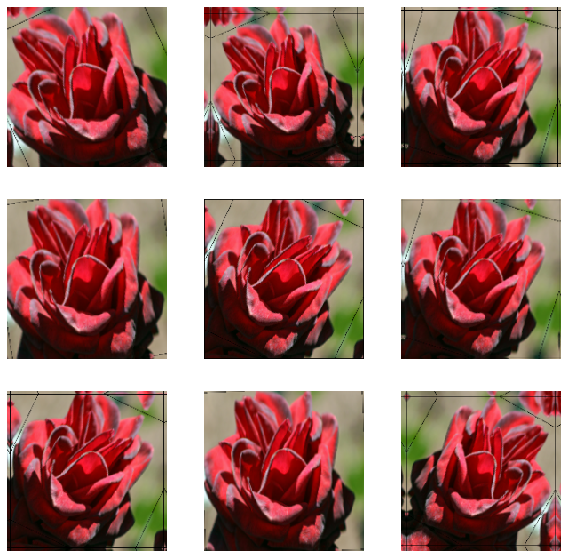

In [76]:
plt.figure(figsize=(10,10))
for images,_ in train_ds.take(1):
    for i in range(9):
        augmented_images=data_augmen(images)
        ax=plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# Dropout

In [77]:
model=Sequential([
    data_augmen,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

# Compile and train the model

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [79]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 45, 45, 64)       

In [80]:
epochs=15
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 198s 2s/step - loss: 1.2032 - accuracy: 0.4915 - val_loss: 1.0381 - val_accuracy: 0.5749
Epoch 2/15
92/92 [==============================] - 201s 2s/step - loss: 0.9974 - accuracy: 0.6189 - val_loss: 0.9642 - val_accuracy: 0.6090
Epoch 3/15
92/92 [==============================] - 199s 2s/step - loss: 0.8802 - accuracy: 0.6611 - val_loss: 0.8454 - val_accuracy: 0.6485
Epoch 4/15
92/92 [==============================] - 197s 2s/step - loss: 0.8184 - accuracy: 0.6829 - val_loss: 0.8340 - val_accuracy: 0.6717
Epoch 5/15
92/92 [==============================] - 202s 2s/step - loss: 0.7752 - accuracy: 0.7006 - val_loss: 0.8313 - val_accuracy: 0.6540
Epoch 6/15
92/92 [==============================] - 225s 2s/step - loss: 0.7292 - accuracy: 0.7197 - val_loss: 0.7746 - val_accuracy: 0.6948
Epoch 7/15
92/92 [==============================] - 223s 2s/step - loss: 0.6967 - accuracy: 0.7371 - val_loss: 0.8303 - val_accuracy: 0.6785
Epoch 8/15
92

# Visualize training results

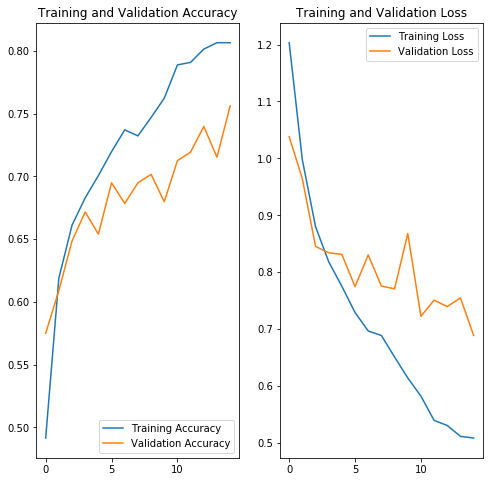

In [81]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predict on new data

In [82]:
#dataset : https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg
sunflower_img='D:/Training Mongga/Programming Program/592px-Red_sunflower.jpg'
img=keras.preprocessing.image.load_img(
    sunflower_img,target_size=(img_height,img_width)
)
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)

pred=model.predict(img_array)
score=tf.nn.softmax(pred[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)],100*np.max(score)))

This image most likely belongs to sunflowers with a 77.03 percent confidence.
